In [1]:
from PIL import Image
import numpy as np

import albumentations as A

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline

from utils import RandomPaste

/home/laurent_fainsin/Documents/unet/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Drafts

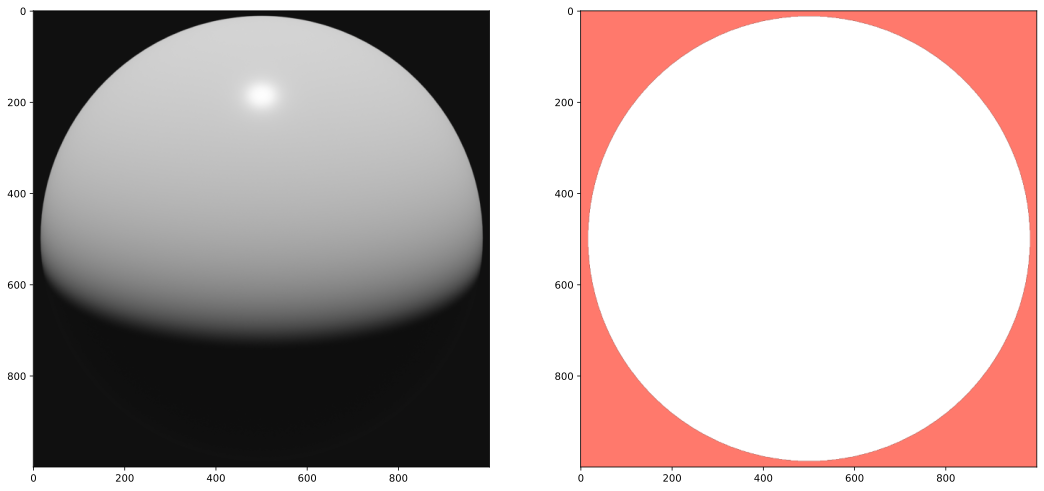

In [2]:
# paste_img = Image.open("/media/disk1/lfainsin/SPHERES/real/2022_SM/Face/2/DSC_0200.jpg").convert("RGBA")
# paste_mask = Image.open("/media/disk1/lfainsin/SPHERES/real/2022_SM/Face/2/MASK.PNG").convert("LA")

paste_img = Image.open("/media/disk1/lfainsin/SPHERES/synth/void_specular/0035.png").convert("RGBA")
paste_mask = Image.open("/media/disk1/lfainsin/SPHERES/synth/void_specular/MASK.PNG").convert("LA")

plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
plt.imshow(paste_img)

plt.subplot(1, 2, 2)
plt.imshow(paste_mask)

ax = plt.gca()
ax.set_facecolor('xkcd:salmon')

plt.show()


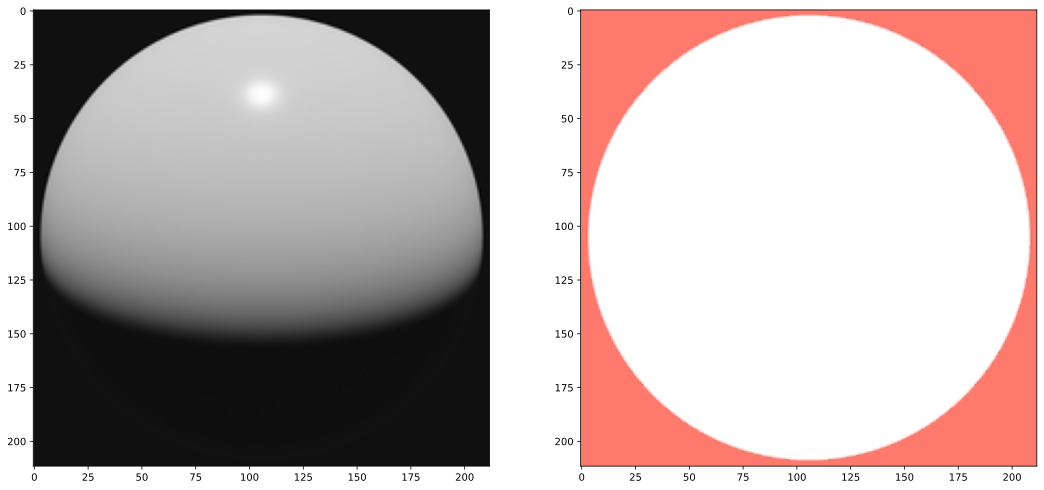

In [3]:
resampler = Image.Resampling.LANCZOS

paste_image_resized = paste_img.resize((212, 212), resample=resampler)
paste_mask_resized = paste_mask.resize((212, 212), resample=resampler)

plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
plt.imshow(paste_image_resized)

plt.subplot(1, 2, 2)
plt.imshow(paste_mask_resized)

ax = plt.gca()
ax.set_facecolor('xkcd:salmon')

plt.show()


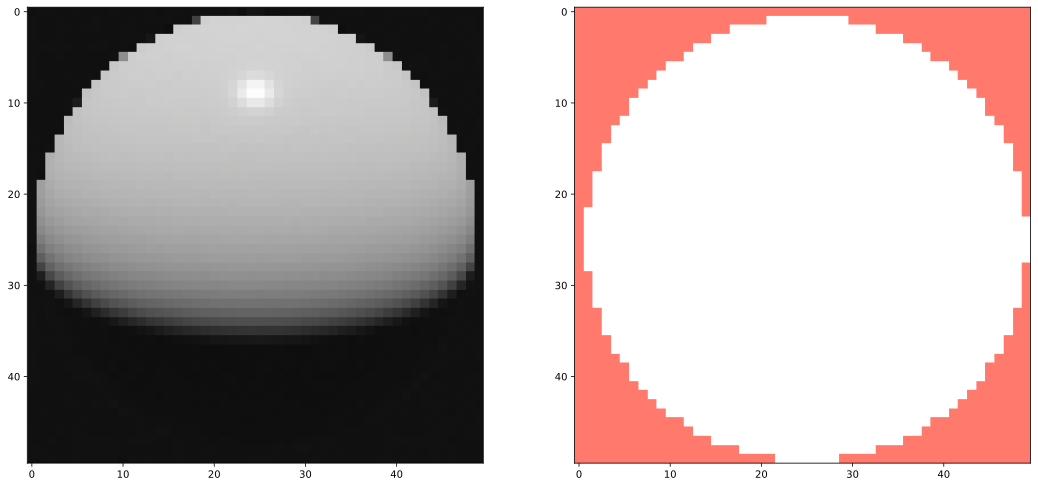

In [4]:
import cv2

# transform = A.Compose([A.RandomScale((-0.95, -0.25), interpolation=cv2.INTER_LANCZOS4)])
transform = A.Compose([A.Resize(width=50, height=50, interpolation=cv2.INTER_LANCZOS4)])

augmentations = transform(image=np.asarray(paste_img), mask=np.asarray(paste_mask))
paste_image_resized2 = augmentations["image"]
paste_mask_resized2 = augmentations["mask"]

plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
plt.imshow(Image.fromarray(paste_image_resized2))

plt.subplot(1, 2, 2)
plt.imshow(Image.fromarray(paste_mask_resized2))

ax = plt.gca()
ax.set_facecolor('xkcd:salmon')

plt.show()


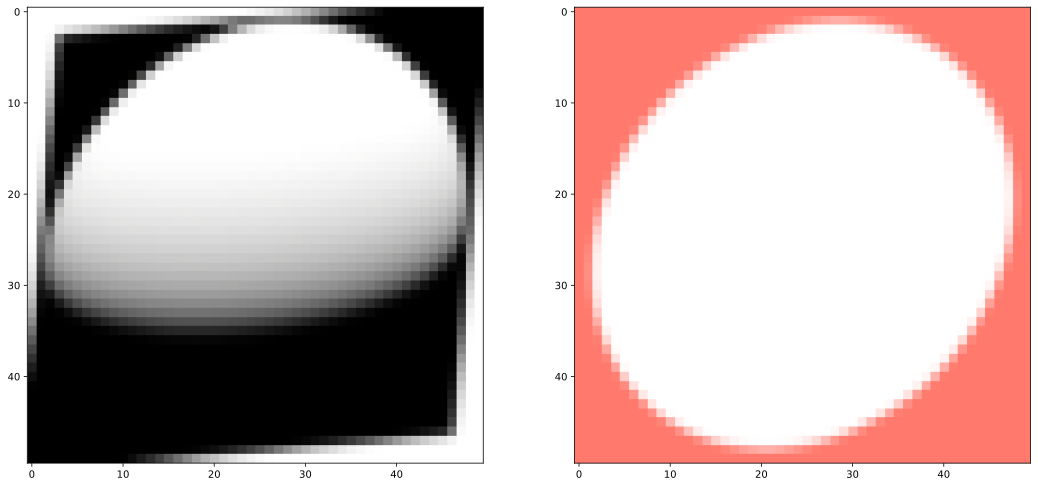

In [5]:
import torchvision.transforms as T

transform = T.Compose(
    [
        T.RandomAffine(0, shear=(-20, 20, -20, 20), interpolation=T.InterpolationMode.BILINEAR),
        T.Resize((50, 50), T.InterpolationMode.BILINEAR),
    ]
)

paste_image_resized3 = paste_img
paste_image_resized3 = T.functional.adjust_brightness(paste_image_resized3, 1.2)
paste_image_resized3 = T.functional.adjust_contrast(paste_image_resized3, 1.2)
paste_image_resized3 = T.functional.affine(paste_image_resized3, angle=0, translate=(0, 0), scale=0.95, shear=(5, 5), interpolation=T.InterpolationMode.BILINEAR)
paste_image_resized3 = T.functional.resize(paste_image_resized3, (50, 50), interpolation=T.InterpolationMode.BILINEAR)

paste_mask_resized3 = paste_mask
paste_mask_resized3 = T.functional.affine(paste_mask_resized3, angle=0, translate=(0, 0), scale=0.95, shear=(5, 5), interpolation=T.InterpolationMode.BILINEAR)
paste_mask_resized3 = T.functional.resize(paste_mask_resized3, (50, 50), interpolation=T.InterpolationMode.BILINEAR)

plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
plt.imshow(paste_image_resized3)

plt.subplot(1, 2, 2)
plt.imshow(paste_mask_resized3)

ax = plt.gca()
ax.set_facecolor("xkcd:salmon")

plt.show()


In [6]:
target_img = Image.open("/home/laurent_fainsin/Images/bg.jpg").convert("RGBA").resize((500, 500))

plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
plt.imshow(target_img)

target_img.paste(paste_image_resized3, (100, 100), paste_mask_resized3)

plt.subplot(1, 2, 2)
plt.imshow(target_img)

plt.show()


# Albumentations custom DualTransform

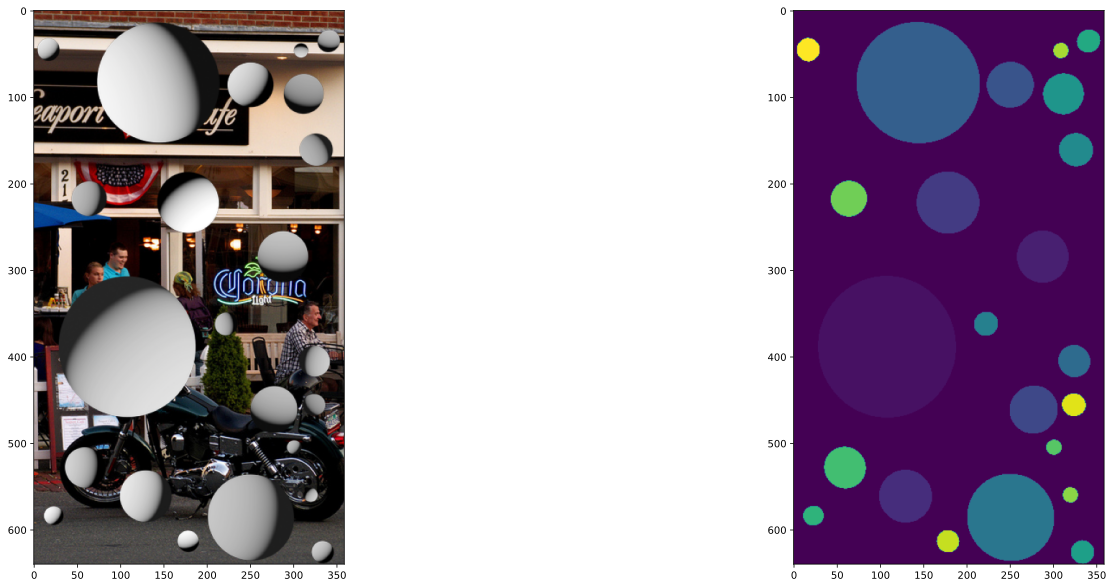

In [30]:
target_img = Image.open("/media/disk1/lfainsin/BACKGROUND/coco/000000000723.jpg").convert("RGBA")
target_img = np.asarray(target_img, dtype=np.uint8)

target_mask = np.zeros((*target_img.shape[:2], 4), dtype=np.uint8)

transforms = A.Compose([
    RandomPaste(25, "/media/disk1/lfainsin/SPHERES/"),
])

aug = transforms(image=target_img, mask=target_mask)
aug_image = aug["image"]
aug_mask = aug["mask"]

plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
plt.imshow(aug_image)

plt.subplot(1, 2, 2)
plt.imshow(aug_mask)

plt.show()
